# Mini-Project: Exploratory Data Analysis



## **Dataset: movies with more than one million of admissions in France over 17 years (from 2003 to 2019)**

## Step 1- Set up environment

### **1.1 - Import pandas**

In [1]:
import pandas as pd

###  **1.2 - Import os**

In [2]:
# Import operating system library (os) to display the current working directory/folder 

import os 

In [3]:
# Display the current working directory/folder

os.getcwd()

'C:\\Users\\Lenovo'

In [4]:
# Generate a list of files in the directory/folder

os.chdir('C:/Users/Lenovo/project_1')
list_of_files= os.listdir()
print(list_of_files)

['Films_france.xlsx']


### **1.3 - Import matplotlib**

In [5]:
import matplotlib.pyplot as plt

## Step 2 - Read Data

In [6]:
# The Excel file has 18 sheets. We need to concatenete them into one data frame.

df = pd.concat(pd.read_excel('Films_france.xlsx',skiprows=5, sheet_name=None), ignore_index=True)  #concat all the sheets in the Excel file
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Mis à jour le 25 mai 2020,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,2019,NaN,NaN,NaN
3,NaN,2018,NaN,NaN,NaN
4,NaN,2017,NaN,NaN,NaN
...,...,...,...,...,...
871,43,MYSTERE DE LA CHAMBRE JAUNE (LE),FRANCE / BELGIQUE,2003-06-11 00:00:00,1060508
872,44,"MOI CESAR, 10 ANS1/2, 1M39",FRANCE,2003-04-09 00:00:00,1058185
873,45,FLEUR DU MAL (LA),FRANCE,2003-02-19 00:00:00,1039599
874,46,EFFROYABLES JARDINS,FRANCE,2003-03-26 00:00:00,1024354


In [7]:
# Display the data types of each column

df.dtypes

Unnamed: 0    object
Unnamed: 1    object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

## Step 3 - Data Cleaning

The data have quality issues and requires cleaning.

###  **3.1 - Remove the rows with NaN values**

In [8]:
# Display the first 25 rows. The first 18 rows correspond to the first excel sheet: a shortcut to access the 17 other sheets.

df.head(22)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Mis à jour le 25 mai 2020,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,2019,NaN,NaN,NaN
3,NaN,2018,NaN,NaN,NaN
4,NaN,2017,NaN,NaN,NaN
5,NaN,2016,NaN,NaN,NaN
6,NaN,2015,NaN,NaN,NaN
7,NaN,2014,NaN,NaN,NaN
8,NaN,2013,NaN,NaN,NaN
9,NaN,2012,NaN,NaN,NaN


In [9]:
# Drop the first 18 rows
# Drop all the headers,that have value "rang" in the excel file. We have 17 headers (for 17 sheets).
df=df.drop(df.index[0:20])
df = df[df["Unnamed: 0"]!= "rang"]  

df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
20,1,LE ROI LION,USA,2019-07-17 00:00:00,9823408
21,2,AVENGERS : ENDGAME,USA,2019-04-24 00:00:00,6823452
22,3,LA REINE DES NEIGES II,USA,2019-11-20 00:00:00,6726478
23,4,QU'EST-CE QU'ON A ENCORE FAIT AU BON DIEU ?,FR / BE,2019-01-30 00:00:00,6714052
24,5,JOKER,USA,2019-10-09 00:00:00,5570603
25,6,TOY STORY 4,USA,2019-06-26 00:00:00,4512853
26,7,"STAR WARS : EPISODE 9, L'ASCENSION DE SKYWALKER",USA,2019-12-18 00:00:00,4366474
27,8,DRAGONS 3 : LE MONDE CACHE,USA,2019-02-06 00:00:00,3387797
28,9,CAPTAIN MARVEL,USA,2019-03-06 00:00:00,3311572
29,10,SPIDER-MAN : FAR FROM HOME,USA,2019-07-03 00:00:00,3228114


###  **3.2 - Display the right index**

In [10]:
#By using "reset_index", the old index is added as a new column, and a new sequential index is used

df=df.reset_index()
df

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,20,1,LE ROI LION,USA,2019-07-17 00:00:00,9823408
1,21,2,AVENGERS : ENDGAME,USA,2019-04-24 00:00:00,6823452
2,22,3,LA REINE DES NEIGES II,USA,2019-11-20 00:00:00,6726478
3,23,4,QU'EST-CE QU'ON A ENCORE FAIT AU BON DIEU ?,FR / BE,2019-01-30 00:00:00,6714052
4,24,5,JOKER,USA,2019-10-09 00:00:00,5570603
...,...,...,...,...,...,...
847,871,43,MYSTERE DE LA CHAMBRE JAUNE (LE),FRANCE / BELGIQUE,2003-06-11 00:00:00,1060508
848,872,44,"MOI CESAR, 10 ANS1/2, 1M39",FRANCE,2003-04-09 00:00:00,1058185
849,873,45,FLEUR DU MAL (LA),FRANCE,2003-02-19 00:00:00,1039599
850,874,46,EFFROYABLES JARDINS,FRANCE,2003-03-26 00:00:00,1024354


In [11]:
# Remove the column "index" corresponding to the old index

df=df.drop(columns=['index'], axis=1)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,LE ROI LION,USA,2019-07-17 00:00:00,9823408
1,2,AVENGERS : ENDGAME,USA,2019-04-24 00:00:00,6823452
2,3,LA REINE DES NEIGES II,USA,2019-11-20 00:00:00,6726478
3,4,QU'EST-CE QU'ON A ENCORE FAIT AU BON DIEU ?,FR / BE,2019-01-30 00:00:00,6714052
4,5,JOKER,USA,2019-10-09 00:00:00,5570603
...,...,...,...,...,...
847,43,MYSTERE DE LA CHAMBRE JAUNE (LE),FRANCE / BELGIQUE,2003-06-11 00:00:00,1060508
848,44,"MOI CESAR, 10 ANS1/2, 1M39",FRANCE,2003-04-09 00:00:00,1058185
849,45,FLEUR DU MAL (LA),FRANCE,2003-02-19 00:00:00,1039599
850,46,EFFROYABLES JARDINS,FRANCE,2003-03-26 00:00:00,1024354


###  **3.3 - Rename the columns**

In [12]:
# Rename the columns
# Drop rows that have "entrées (millions) values"
#df=df[df['Admissions'].apply(lambda x: str(x).isdigit())] # there was a string variable "entrée (millions)

df=df.rename(columns={"Unnamed: 0": "Rank",
                   "Unnamed: 1": "Title",
                   "Unnamed: 2": "Country",
                   "Unnamed: 3": "Release Date",
                   "Unnamed: 4": "Admissions"
                  })
#df = df[df["Admissions"]!= "entrées (millions)"] 
df

,Rank,Title,Country,Release Date,Admissions
0,1,LE ROI LION,USA,2019-07-17 00:00:00,9823408
1,2,AVENGERS : ENDGAME,USA,2019-04-24 00:00:00,6823452
2,3,LA REINE DES NEIGES II,USA,2019-11-20 00:00:00,6726478
3,4,QU'EST-CE QU'ON A ENCORE FAIT AU BON DIEU ?,FR / BE,2019-01-30 00:00:00,6714052
4,5,JOKER,USA,2019-10-09 00:00:00,5570603
...,...,...,...,...,...
847,43,MYSTERE DE LA CHAMBRE JAUNE (LE),FRANCE / BELGIQUE,2003-06-11 00:00:00,1060508
848,44,"MOI CESAR, 10 ANS1/2, 1M39",FRANCE,2003-04-09 00:00:00,1058185
849,45,FLEUR DU MAL (LA),FRANCE,2003-02-19 00:00:00,1039599
850,46,EFFROYABLES JARDINS,FRANCE,2003-03-26 00:00:00,1024354


###  **3.4 - Clean the "Country" column"**

In [13]:
# List unique values in the column "Country". We need to make sure that the countries have the same value.
# Some countries have different denomination

df.Country.unique()

array(['USA', 'FR / BE', 'FR', 'KS', 'GB', 'FR / IT', 'US', 'GB / US',
       nan, 'AUS', 'FR / CA', 'FR / GB', 'ETATS UNIS', 'FRANCE',
       'GRANDE BRETAGNE', 'FRANCE / BELGIQUE', 'FRANCE / GRANDE BRETAGNE',
       'CANADA / FRANCE', 'FRANCE / MAROC', 'FRANCE / ITALIE',
       'AUSTRALIE', 'GRANDE BRETAGNE / ETATS UNIS', 'CHINE / FRANCE',
       'FRANCE / REPUBLIQUE TCHEQUE/ BELGIQUE', 'nationalité',
       'NOUVELLE ZELANDE', 'ETATS-UNIS', 'CA', 'CANADA',
       'FRANCE / BELGIQUE / LUXEMBOURG', 'FRANCE  / CANADA',
       'FRANCE / LUXEMBOURG / BELGIQUE',
       'FRANCE  / HONGRIE / ESPAGNE / ITALIE', 'FRANCE  / BELGIQUE',
       'ETATS UNIS / GRANDE BRETAGNE', 'ESPAGNE',
       'FRANCE / BELGIQUE / ALLEMAGNE', 'FRANCE / SUISSE', 'Allemagne',
       'ALLEMAGNE / GRANDE BRETAGNE / FRANCE',
       'FRANCE / ALLEMAGNE / HONGRIE', 'Belgique', 'CANADA  / FRANCE',
       'FRANCE / ALLEMAGNE / GRANDE BRETAGNE',
       'FRANCE / BELGIQUE / ROUMANIE / ITALIE', 'SUEDE', 'France',
       'Fra

In [14]:
# Replace all the countries with only one name

df['Country']=df["Country"].replace('ETATS UNIS', 'US')
df['Country']=df["Country"].replace('NOUVELLE ZELANDE', 'NEW ZEL')
df['Country']=df["Country"].replace('AUSTRALIE', 'AUS')
df['Country']=df["Country"].replace('ETATS-UNIS', 'US')
df['Country']=df["Country"].replace('ETATS UNIS / GRANDE BRETAGNE', 'US')
df['Country']=df["Country"].replace('GRANDE BRETAGNE / ETATS UNIS', 'US')
df['Country']=df["Country"].replace('France', 'FR')
df['Country']=df["Country"].replace('FRANCE', 'FR')
df['Country']=df["Country"].replace('USA', 'US')
df['Country']=df["Country"].replace('BELGIQUE', 'BE')
df['Country']=df["Country"].replace('GRANDE BRETAGNE', 'GB')
df['Country']=df["Country"].replace('ESPAGNE', 'ES')
df['Country']=df["Country"].replace('ROUMANIE', 'RO')
df['Country']=df["Country"].replace('CANADA', 'CA')
df['Country']=df["Country"].replace('CHINA', 'CH')
df['Country']=df["Country"].replace('GRANDE BRETAGNE', 'GB')
df['Country']=df["Country"].replace('ALLEMAGNE', 'GE')
df['Country']=df["Country"].replace('Italie', 'IT')
df['Country']=df["Country"].replace('Canada', 'CA')

df['Country']=df["Country"].replace('Espagne', 'ES')
df['Country']=df["Country"].replace('REPUBLIQUE TCHEQUE', 'REP TCH')
       
df['Country']=df["Country"].replace('SUEDE', 'SW')
df['Country']=df["Country"].replace('LUXEMBOURG', 'LUX')
df['Country']=df["Country"].replace(['CHINE / FRANCE','FRANCE / ALLEMAGNE / HONGRIE', 'Belgique', 'CANADA  / FRANCE',
       'FRANCE / ALLEMAGNE / GRANDE BRETAGNE',
       'FRANCE / BELGIQUE / ROUMANIE / ITALIE', 'SW',
       'France / Allemagne / Espagne / Italie',
       'France / Canada / Italie',
       'France / Allemagne / REPUBLIQUE TCHEQUE',
       'France / REPUBLIQUE TCHEQUE / GRANDE BRETAGNE',
       'France / Allemagne', 'GE', 'FRANCE / BELGIQUE / ESPAGNE / ITALIE',
       'FRANCE / ALLEMAGNE',
       'FRANCE / GRANDE BRETAGNE / LUXEMBOURG / BELGIQUE',
       'FRANCE / ALLEMAGNE / GRANDE BRETAGNE / BELGIQUE / ROUMANIE',
       'FRANCE / REPUBLIQUE TCHEQUE / GRANDE BRETAGNE',
       'GRANDE BRETAGNE / FRANCE / PAYS BAS',
       'FRANCE / CANADA / ALLEMAGNE / ITALIE',
       'FRANCE / ITALIE / GRANDE BRETAGNE',
       'FRANCE / ALLEMAGNE / ESPAGNE',
       'FRANCE / GRANDE BRETAGNE / ESPAGNE / ITALIE', 'FRANCE / CANADA',
       'FRANCE / ESPAGNE','FRANCE / ITALIE','FRANCE / BELGIQUE / ALLEMAGNE', 'FRANCE / SUISSE', 'Allemagne',
       'ALLEMAGNE / GRANDE BRETAGNE / FRANCE', 'CANADA / FRANCE', 'FRANCE / MAROC', 'FRANCE / ITALIE','FRANCE / REPUBLIQUE TCHEQUE/ BELGIQUE','FRANCE / BELGIQUE / LUXEMBOURG', 'FRANCE  / CANADA',
       'FRANCE / LUXEMBOURG / BELGIQUE',
       'FRANCE  / HONGRIE / ESPAGNE / ITALIE', 'FRANCE  / BELGIQUE','FRANCE / BELGIQUE'], 'FR')


df['Country']=df["Country"].replace('FRANCE / GRANDE BRETAGNE', 'FR')
df['Country']=df["Country"].replace('FR / BE', 'FR')
df['Country']=df["Country"].replace('FR / IT', 'FR')
df['Country']=df["Country"].replace('FR / CA', 'FR')
df['Country']=df["Country"].replace('FR / GB', 'FR')
df['Country']=df["Country"].replace('GB / US', 'US')
#f['Country']=df["Country"].replace('ETATS-UNIS', 'US')
#df['Country']=df["Country"].replace('HONGRIE', 'HG')

###  **3.5 Convert "Release Date" to Datetime format**

In [15]:
# Convert column "Release Date" to Datetime

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df

,Rank,Title,Country,Release Date,Admissions
0,1,LE ROI LION,US,2019-07-17,9823408
1,2,AVENGERS : ENDGAME,US,2019-04-24,6823452
2,3,LA REINE DES NEIGES II,US,2019-11-20,6726478
3,4,QU'EST-CE QU'ON A ENCORE FAIT AU BON DIEU ?,FR,2019-01-30,6714052
4,5,JOKER,US,2019-10-09,5570603
...,...,...,...,...,...
847,43,MYSTERE DE LA CHAMBRE JAUNE (LE),FR,2003-06-11,1060508
848,44,"MOI CESAR, 10 ANS1/2, 1M39",FR,2003-04-09,1058185
849,45,FLEUR DU MAL (LA),FR,2003-02-19,1039599
850,46,EFFROYABLES JARDINS,FR,2003-03-26,1024354


###  **3.6 - Creation of two columns "Years" and "Months"**

In [16]:

df['Year'] = pd.DatetimeIndex(df['Release Date']).year
df['Months'] = pd.DatetimeIndex(df['Release Date']).month
df

,Rank,Title,Country,Release Date,Admissions,Year,Months
0,1,LE ROI LION,US,2019-07-17,9823408,2019.0,7.0
1,2,AVENGERS : ENDGAME,US,2019-04-24,6823452,2019.0,4.0
2,3,LA REINE DES NEIGES II,US,2019-11-20,6726478,2019.0,11.0
3,4,QU'EST-CE QU'ON A ENCORE FAIT AU BON DIEU ?,FR,2019-01-30,6714052,2019.0,1.0
4,5,JOKER,US,2019-10-09,5570603,2019.0,10.0
...,...,...,...,...,...,...,...
847,43,MYSTERE DE LA CHAMBRE JAUNE (LE),FR,2003-06-11,1060508,2003.0,6.0
848,44,"MOI CESAR, 10 ANS1/2, 1M39",FR,2003-04-09,1058185,2003.0,4.0
849,45,FLEUR DU MAL (LA),FR,2003-02-19,1039599,2003.0,2.0
850,46,EFFROYABLES JARDINS,FR,2003-03-26,1024354,2003.0,3.0


###  **3.7 - Replace the Months columns with month names for easier understanding**

In [17]:
# Replace the Months columns with months names for easier understanding

month = {
    1:"January",            
    2:"February",
    3:"March",
    4:"April",            
    5:"May",
    6:"June",
    7:"July",            
    8:"August",
    9:"September",
    10:"October",            
    11:"November",
    12:"December",
}
       
df.replace({"Months": month}, inplace=True)
df.head()

,Rank,Title,Country,Release Date,Admissions,Year,Months
0,1,LE ROI LION,US,2019-07-17,9823408,2019.0,July
1,2,AVENGERS : ENDGAME,US,2019-04-24,6823452,2019.0,April
2,3,LA REINE DES NEIGES II,US,2019-11-20,6726478,2019.0,November
3,4,QU'EST-CE QU'ON A ENCORE FAIT AU BON DIEU ?,FR,2019-01-30,6714052,2019.0,January
4,5,JOKER,US,2019-10-09,5570603,2019.0,October


###  **3.8 - Replace NaN values with 0**

In [18]:
# Count NaN values in each column and replace them with 0 

df.isna().sum()
df = df.fillna(0)
df=df[(df != 0).all(1)]

###  **3.9 - Convert "Rank", "Year" and "Admissions" columns into integers**

In [19]:
df['Admissions']=df['Admissions'].astype("int32")
df['Rank']=df['Rank'].astype("int32")
df['Year']=df['Year'].astype("int32")

df.dtypes

Rank             int32
Title           object
Country         object
Release Date    object
Admissions       int32
Year             int32
Months          object
dtype: object

###  **3.10  - Sort the Dataframe by "Admissions"**

In [20]:
df = df.sort_values(by='Admissions')
df=df.reset_index()
df=df.drop(columns=['index'],axis=1)

df

,Rank,Title,Country,Release Date,Admissions,Year,Months
0,53,DERNIER DES TEMPLIERS (LE),US,2011-01-12 00:00:00,1000730,2011,January
1,46,JOUR OU LA TERRE S'ARRETA (LE),US,2008-12-10 00:00:00,1000867,2008,December
2,52,SANS IDENTITE,FR,2011-03-02 00:00:00,1001308,2011,March
3,53,5EME VAGUE (LA),US,2016-01-27 00:00:00,1002794,2016,January
4,51,LA FAMILLE ADDAMS,US,2019-12-04 00:00:00,1003471,2019,December
...,...,...,...,...,...,...,...
831,1,LE ROI LION,US,2019-07-17 00:00:00,9823408,2019,July
832,1,BRONZÉS 3 (LES) - AMIS POUR LA VIE,FR,2006-02-01 00:00:00,10227811,2006,February
833,1,QU'EST-CE QU'ON A FAIT AU BON DIEU ?,FR,2014-04-16 00:00:00,12343201,2014,April
834,1,INTOUCHABLES,FR,2011-11-02 00:00:00,16672833,2011,November


In [21]:
df_ten=df.tail(10)
df_ten

,Rank,Title,Country,Release Date,Admissions,Year,Months
826,1,AGE DE GLACE 3 LE TEMPS DES DINOSAURES (L'),US,2009-07-03 00:00:00,7831762,2009,July
827,1,MONDE DE NEMO (LE),US,2003-11-26 00:00:00,7937655,2003,November
828,2,RIEN A DECLARER,FR,2011-02-02 00:00:00,8102335,2011,February
829,1,CHORISTES (LES),FR,2004-03-17 00:00:00,8432827,2004,March
830,1,AVATAR,US,2009-12-16 00:00:00,8467300,2009,December
831,1,LE ROI LION,US,2019-07-17 00:00:00,9823408,2019,July
832,1,BRONZÉS 3 (LES) - AMIS POUR LA VIE,FR,2006-02-01 00:00:00,10227811,2006,February
833,1,QU'EST-CE QU'ON A FAIT AU BON DIEU ?,FR,2014-04-16 00:00:00,12343201,2014,April
834,1,INTOUCHABLES,FR,2011-11-02 00:00:00,16672833,2011,November
835,1,BIENVENUE CHEZ LES CH'TIS,FR,2008-02-27 00:00:00,20438510,2008,February


###  **3.11  - Create a new Dataframe with Admissions > 3 millions**

In [22]:
df_3mil = df[df['Admissions'] > 3000000] 
df_3mil

,Rank,Title,Country,Release Date,Admissions,Year,Months
653,13,"STAR WARS : EPISODE 7, LE REVEIL DE LA FORCE",US,2015-12-16 00:00:00,3002807,2015,December
654,10,THE DARK KNIGHT LE CHEVALIER NOIR,US,2008-08-13 00:00:00,3004289,2008,August
655,8,INSAISISSABLES,US,2013-07-31 00:00:00,3008058,2013,July
656,17,"MOI, MOCHE ET MECHANT",US,2010-10-06 00:00:00,3009552,2010,October
657,12,MISSION IMPOSSIBLE FALL OUT,US,2018-08-01 00:00:00,3017843,2018,August
...,...,...,...,...,...,...,...
831,1,LE ROI LION,US,2019-07-17 00:00:00,9823408,2019,July
832,1,BRONZÉS 3 (LES) - AMIS POUR LA VIE,FR,2006-02-01 00:00:00,10227811,2006,February
833,1,QU'EST-CE QU'ON A FAIT AU BON DIEU ?,FR,2014-04-16 00:00:00,12343201,2014,April
834,1,INTOUCHABLES,FR,2011-11-02 00:00:00,16672833,2011,November


## Step 4 - Aggregate Data

###  **4.1 - Aggregate function to count "Country" and sum the "Admissions"**

In [23]:
df_country = df[["Country","Months","Admissions"]].groupby('Country').agg(
    Country_total=pd.NamedAgg("Country", "count"),
    Admissions_total=pd.NamedAgg("Admissions", "sum")
)

df_country= df_country.reset_index()    # Reset index so that Country becomes a column
 

df_country

,Country,Country_total,Admissions_total
0,AUS,4,7138114
1,CA,2,3445479
2,ES,4,6972241
3,FR,297,659236981
4,GB,51,148018961
5,KS,1,1706124
6,NEW ZEL,6,18548666
7,US,471,1094643667


In [24]:
df_country.sort_values(by="Country_total", ascending=False)

,Country,Country_total,Admissions_total
7,US,471,1094643667
3,FR,297,659236981
4,GB,51,148018961
6,NEW ZEL,6,18548666
0,AUS,4,7138114
2,ES,4,6972241
1,CA,2,3445479
5,KS,1,1706124


###  **4.2 - Aggregate function to count "Months" and sum the "Admissions"**

In [25]:
df_months = df[["Months","Admissions"]].groupby('Months').agg(
    Months_total=pd.NamedAgg("Months", "count"),
    Admissions_total=pd.NamedAgg("Admissions", "sum")
)

df_months = df_months.reset_index()    #Reset index to create a months column
df_months

,Months,Months_total,Admissions_total
0,April,82,193536837
1,August,59,120716572
2,December,85,187646542
3,February,102,257987254
4,January,69,137536034
5,July,74,213267974
6,June,56,137312833
7,March,58,119143013
8,May,56,129689281
9,November,65,175866122


In [26]:
df_months.sort_values(by="Months_total", ascending=False)

,Months,Months_total,Admissions_total
3,February,102,257987254
10,October,95,206685430
2,December,85,187646542
0,April,82,193536837
5,July,74,213267974
4,January,69,137536034
9,November,65,175866122
1,August,59,120716572
7,March,58,119143013
6,June,56,137312833


It appears that February, October and December are the months when most of the movies (>1 millions of admissions) are released.

In [27]:
df_months.sort_values(by="Admissions_total", ascending=False)

,Months,Months_total,Admissions_total
3,February,102,257987254
5,July,74,213267974
10,October,95,206685430
0,April,82,193536837
2,December,85,187646542
9,November,65,175866122
4,January,69,137536034
6,June,56,137312833
8,May,56,129689281
1,August,59,120716572


It appears that February, July and October are the months when the highest admission.

###  **4.3 - Aggregate function to count "Country" and sum the "Admissions > 3 millions"**

In [28]:
df_country3 = df_3mil[["Country","Months","Admissions"]].groupby('Country').agg(
    Country_total3=pd.NamedAgg("Country", "count"),
    Admissions_total3=pd.NamedAgg("Admissions", "sum")
)

df_country3= df_country3.reset_index()    # Reset index so that Country becomes a column
 

df_country3

,Country,Country_total3,Admissions_total3
0,FR,51,269371169
1,GB,17,85867437
2,NEW ZEL,3,12579700
3,US,112,489882120


## Step 5 -  Data Vizualisation

### **5.1 - Top 10 movies**

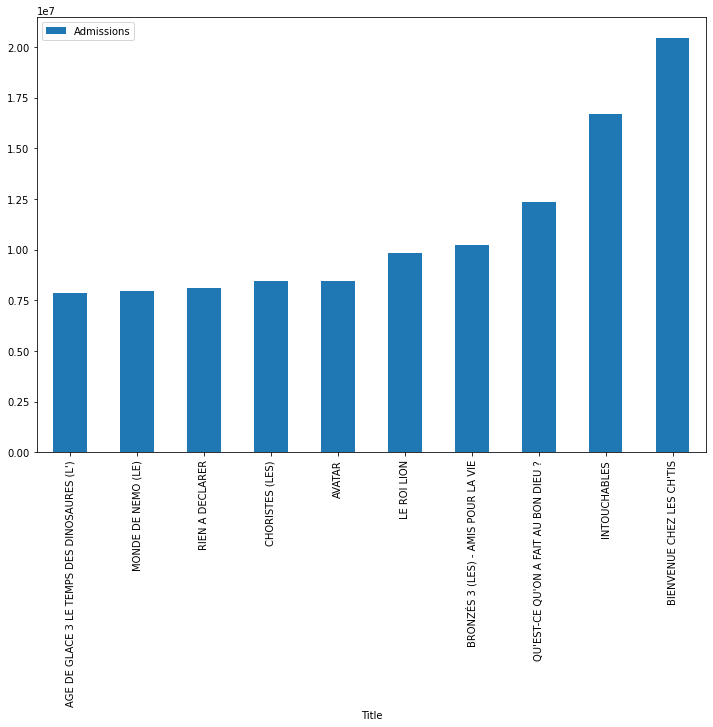

In [29]:
df_ten.plot.bar(
    x="Title", 
    y="Admissions",
    figsize=(12,8)
)

plt.show()

In [30]:
# Use of Aggregates function to count months and admissions

df_ten_country = df_ten[["Country","Admissions"]].groupby('Country').agg(
    Months_total=pd.NamedAgg("Country", "count"),
    Admissions_total=pd.NamedAgg("Admissions", "sum")
)

df_ten_country = df_ten_country.reset_index()    #Reset index to create a months column
df_ten_country

,Country,Months_total,Admissions_total
0,FR,6,76217517
1,US,4,34060125


Out of the 10 first movies, 6 are French and 4 are American.

### 5.2 How many movies are American and French?

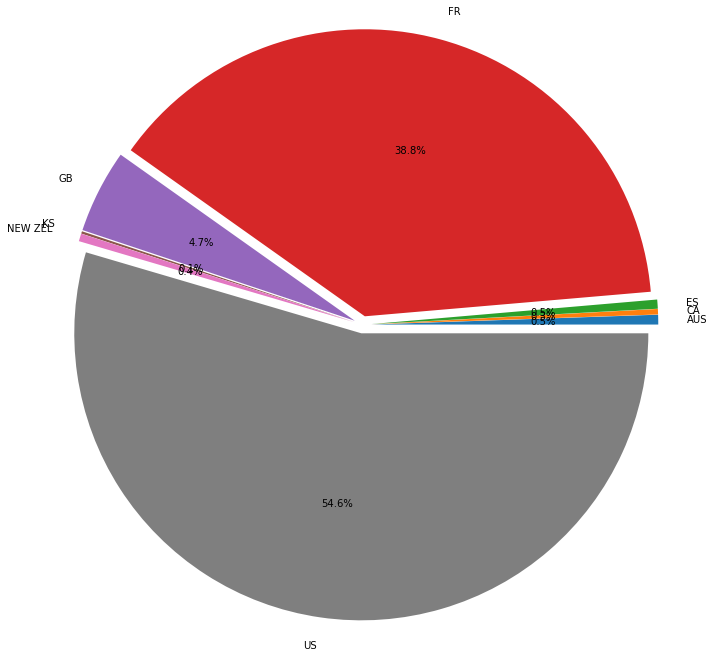

In [31]:
sums=df.groupby('Country').sum()['Rank'] 
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

plt.pie(sums, explode=explode,labels=sums.index,radius=3.3, autopct='%1.1f%%')
plt.show()

Almost 55% of the movies (>1 millions of admissions) are American. About 39% are French.

### 5.3 How many movies (>3millions) are American and French?

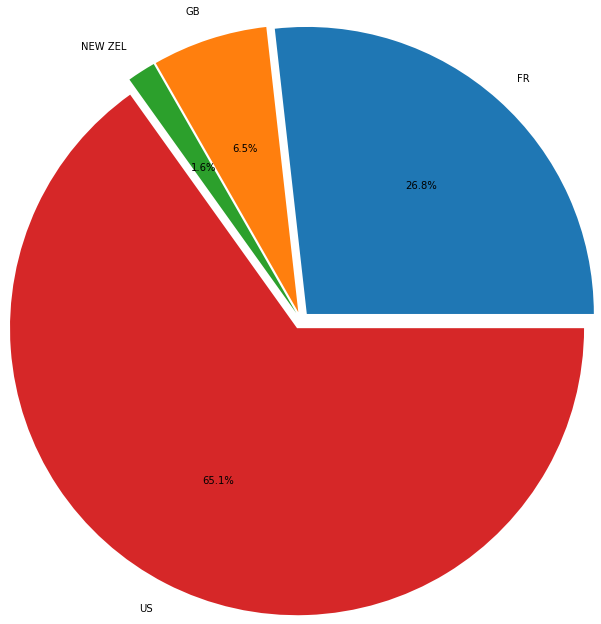

In [32]:
sums=df_3mil.groupby('Country').sum()['Rank'] 
explode=(0.1,0.1,0.1,0.1)

plt.pie(sums, explode=explode,labels=sums.index,radius=3.3, autopct='%1.1f%%')
plt.show()

Almost 55% of the movies (>1 millions of admissions) are American. About 39% are French.

### 5.4 What is the best month to release a movie?

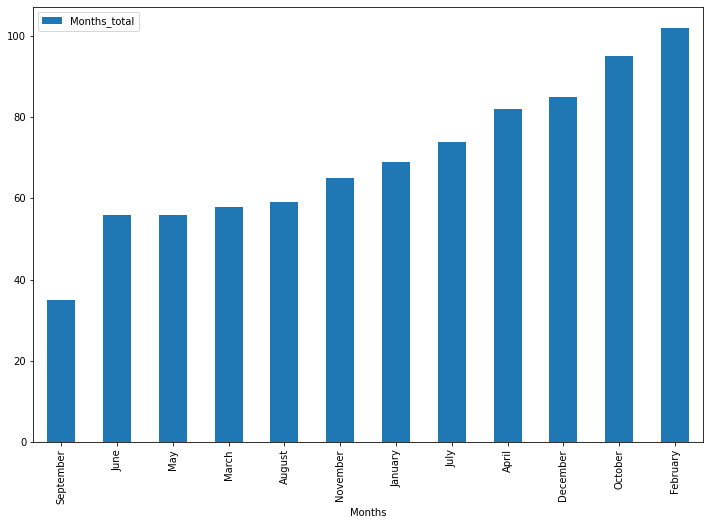

In [33]:
df_months.sort_values(by="Months_total").plot.bar(
    x="Months", 
    y="Months_total",
    figsize=(12,8)
)

plt.show()

The 3 best months to release a movie are February, October and December.
September is the last month.

### 5.5  What is the months with the highest admissions?

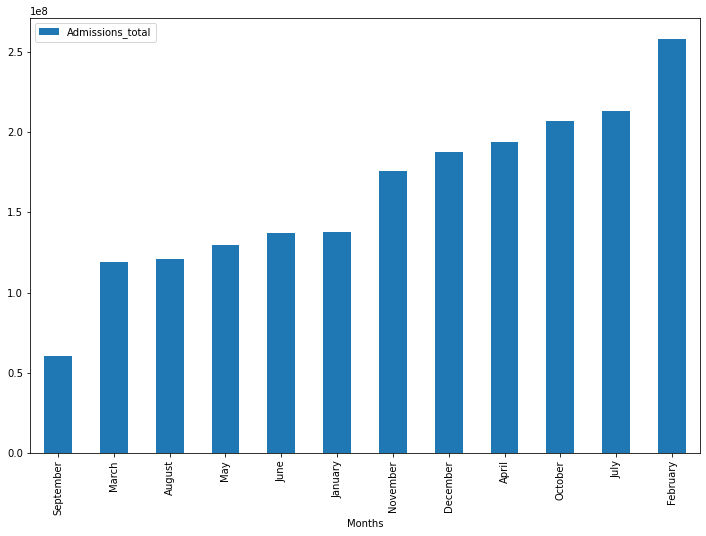

In [34]:
df_months.sort_values(by="Admissions_total").plot.bar(
    x="Months", 
    y="Admissions_total",
    figsize=(12,8)
)
plt.show()

The months with the highest admissions are February, July and October.
September is the last.